In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('./input/TUSZ/_DOCS/seizures_v36r.xlsx', engine='openpyxl', sheet_name='train', header=[0,1]).dropna(how='all')
df_dev = pd.read_excel('./input/TUSZ/_DOCS/seizures_v36r.xlsx', engine='openpyxl', sheet_name='dev', header=[0,1]).dropna(how='all')
df = pd.concat([df, df_dev], axis=0)

In [3]:
df.columns  = ['_'.join(col) for col in df.columns.values]

In [4]:
df.columns

Index(['Index_Unnamed: 0_level_1', 'File No._Unnamed: 1_level_1',
       'Patient_Unnamed: 2_level_1', 'Session_Unnamed: 3_level_1',
       'File_Unnamed: 4_level_1', 'EEG Type_Unnamed: 5_level_1',
       'EEG SubType_Unnamed: 6_level_1', 'LTM -or- Routine_Unnamed: 7_level_1',
       'Normal/ Abnormal_Unnamed: 8_level_1',
       'No. Seizures/ File_Unnamed: 9_level_1',
       'No. Seizures/ Session_Unnamed: 10_level_1',
       'No. Seizures/ Session_Filename', 'Seizure Time_Start',
       'Seizure Time_Stop', 'Seizure Type_Unnamed: 14_level_1',
       'Seizure Type_Unnamed: 15_level_1', 'Summary_EEG Type',
       'Summary_Sessions', 'Summary_Freq.', 'Summary_Cum.', 'Summary_Cum..1',
       'Summary_EEG SubType', 'Summary_Sessions.1', 'Summary_Freq..1',
       'Summary_Cum..2', 'Summary_Cum..3', 'Summary_Seizure Type',
       'Summary_Events', 'Summary_Freq..2', 'Summary_Cum..4',
       'Summary_Cum..5'],
      dtype='object')

In [5]:
df.count()

Index_Unnamed: 0_level_1                     7513
File No._Unnamed: 1_level_1                  7513
Patient_Unnamed: 2_level_1                   1423
Session_Unnamed: 3_level_1                   1423
File_Unnamed: 4_level_1                      5612
EEG Type_Unnamed: 5_level_1                  1423
EEG SubType_Unnamed: 6_level_1               1423
LTM -or- Routine_Unnamed: 7_level_1          1423
Normal/ Abnormal_Unnamed: 8_level_1          1423
No. Seizures/ File_Unnamed: 9_level_1        5612
No. Seizures/ Session_Unnamed: 10_level_1    1423
No. Seizures/ Session_Filename               7513
Seizure Time_Start                           3050
Seizure Time_Stop                            3050
Seizure Type_Unnamed: 14_level_1             3050
Seizure Type_Unnamed: 15_level_1                0
Summary_EEG Type                               32
Summary_Sessions                               50
Summary_Freq.                                  36
Summary_Cum.                                   16


In [6]:
fs_df =  pd.DataFrame.from_dict(pd.read_pickle('./input/TUSZ/_DOCS/fs.pickle'), orient='index')
fs_df = fs_df.reset_index().rename(columns={"index": "filename"})
fs_df['filename'] = fs_df['filename'].apply(
    lambda x: './{}'.format(x.split('TUSZ/edf/')[1].split('.edf')[0]))
fs_df.sample(n=5)

,filename,fs,ch
1720,./train/01_tcp_ar/076/00007617/s003_2011_02_02...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
790,./dev/01_tcp_ar/022/00002289/s005_2012_03_14/0...,"[512, 512, 512, 512, 512, 512, 512, 512, 512, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
3835,./train/01_tcp_ar/034/00003437/s006_2014_10_20...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
5604,./train/03_tcp_ar_a/023/00002365/s001_2005_10_...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
2259,./train/01_tcp_ar/104/00010412/s007_2013_08_08...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."


In [7]:
fs_df.astype({'filename': str, 'fs': str, 'ch': str})['ch'].unique()

array(["['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG 26-REF', 'EEG 27-REF', 'EEG 28-REF', 'EEG 29-REF', 'EEG 30-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']",
       "['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']",
       "['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-RE

In [8]:
# df =
df['Filename'] = df['No. Seizures/ Session_Filename'].apply(lambda x: x.split('.tse')[0])
len(df)


7513

In [9]:
fs_df_merged = pd.merge(left=fs_df, right=df, left_on='filename', right_on='Filename', how='right')
fs_df_merged.sample(10)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Sessions.1,Summary_Freq..1,Summary_Cum..2,Summary_Cum..3,Summary_Seizure Type,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename
6464,./train/03_tcp_ar_a/053/00005371/s003_2009_01_...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",5695.0,4357.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/053/00005371/s003_2009_01_...
2477,./train/01_tcp_ar/129/00012966/s002_2015_09_02...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",2396.0,1819.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/129/00012966/s002_2015_09_02...
7148,./train/03_tcp_ar_a/046/00004671/s020_2015_03_...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",5199.0,3965.0,NaN,NaN,t006,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/046/00004671/s020_2015_03_...
4793,./train/01_tcp_ar/065/00006546/s039_2014_03_21...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1095.0,753.0,NaN,NaN,t004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/065/00006546/s039_2014_03_21...
6469,./train/03_tcp_ar_a/053/00005371/s003_2009_01_...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",5700.0,4357.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/053/00005371/s003_2009_01_...
5056,./train/01_tcp_ar/071/00007122/s008_2013_03_07...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1727.0,1256.0,NaN,NaN,t001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/071/00007122/s008_2013_03_07...
1546,./train/01_tcp_ar/064/00006440/s002_2010_04_17...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",3526.0,2655.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/064/00006440/s002_2010_04_17...
2777,./train/01_tcp_ar/131/00013145/s006_2015_09_03...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",3826.0,2916.0,NaN,NaN,t000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/131/00013145/s006_2015_09_03...
5970,./train/02_tcp_le/065/00006514/s007_2010_05_03...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",440.0,295.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/065/00006514/s007_2010_05_03...
1577,./train/01_tcp_ar/089/00008980/s001_2012_08_09...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4250.0,3299.0,8980.0,s001,t000,Inpatient,General,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/089/00008980/s001_2012_08_09...


In [10]:
fs_df_merged.count()

filename                                     7513
fs                                           7513
ch                                           7513
Index_Unnamed: 0_level_1                     7513
File No._Unnamed: 1_level_1                  7513
Patient_Unnamed: 2_level_1                   1423
Session_Unnamed: 3_level_1                   1423
File_Unnamed: 4_level_1                      5612
EEG Type_Unnamed: 5_level_1                  1423
EEG SubType_Unnamed: 6_level_1               1423
LTM -or- Routine_Unnamed: 7_level_1          1423
Normal/ Abnormal_Unnamed: 8_level_1          1423
No. Seizures/ File_Unnamed: 9_level_1        5612
No. Seizures/ Session_Unnamed: 10_level_1    1423
No. Seizures/ Session_Filename               7513
Seizure Time_Start                           3050
Seizure Time_Stop                            3050
Seizure Type_Unnamed: 14_level_1             3050
Seizure Type_Unnamed: 15_level_1                0
Summary_EEG Type                               32


In [11]:
fs_df_merged.isna().any()

filename                                     False
fs                                           False
ch                                           False
Index_Unnamed: 0_level_1                     False
File No._Unnamed: 1_level_1                  False
Patient_Unnamed: 2_level_1                    True
Session_Unnamed: 3_level_1                    True
File_Unnamed: 4_level_1                       True
EEG Type_Unnamed: 5_level_1                   True
EEG SubType_Unnamed: 6_level_1                True
LTM -or- Routine_Unnamed: 7_level_1           True
Normal/ Abnormal_Unnamed: 8_level_1           True
No. Seizures/ File_Unnamed: 9_level_1         True
No. Seizures/ Session_Unnamed: 10_level_1     True
No. Seizures/ Session_Filename               False
Seizure Time_Start                            True
Seizure Time_Stop                             True
Seizure Type_Unnamed: 14_level_1              True
Seizure Type_Unnamed: 15_level_1              True
Summary_EEG Type               

In [12]:
def get_index(x):
    if 'EEG FP1-REF' in x:
        return x.index('EEG FP1-REF')
    elif 'EEG FP1-LE' in x:
        return x.index('EEG FP1-LE')
    else:
        return pd.NA
fs_df_merged['FP1_index'] = fs_df_merged['ch'].apply(get_index)

In [13]:
fs_df = fs_df_merged
fs_df['Seizure_Start'] = fs_df['Seizure Time_Start'].fillna(0)
fs_df['Seizure_Start'] = fs_df['Seizure_Start'] * (fs_df['fs'].map(lambda x: x[0]))
fs_df['Seizure_Start'] = fs_df['Seizure_Start'].apply(lambda x: [[int(x)]])
fs_df['Seizure_Stop'] = fs_df['Seizure Time_Stop'].fillna(0)
fs_df['Seizure_Stop'] = fs_df['Seizure_Stop'] * (fs_df['fs'].map(lambda x: x[0]))
fs_df['Seizure_Stop'] = fs_df['Seizure_Stop'].apply(lambda x: [[int(x)]])
fs_df.sample(5)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Cum..3,Summary_Seizure Type,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop
7182,./train/03_tcp_ar_a/080/00008053/s003_2011_03_...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4776.0,3697.0,NaN,NaN,t002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/080/00008053/s003_2011_03_...,0,[[0]],[[0]]
1711,./train/01_tcp_ar/113/00011333/s012_2014_03_05...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",3043.0,2324.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/113/00011333/s012_2014_03_05...,0,[[83856]],[[85661]]
7491,./train/03_tcp_ar_a/023/00002380/s003_2006_01_...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",6093.0,4586.0,NaN,NaN,t005,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/023/00002380/s003_2006_01_...,0,[[0]],[[0]]
978,./dev/01_tcp_ar/065/00006546/s024_2012_02_25/0...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",210.0,132.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./dev/01_tcp_ar/065/00006546/s024_2012_02_25/0...,0,[[75353]],[[82009]]
3076,./train/01_tcp_ar/104/00010418/s012_2014_05_30...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4567.0,3538.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/104/00010418/s012_2014_05_30...,0,[[77013]],[[79674]]


In [14]:
fs_df['fs_FP1'] = fs_df['fs'].map(lambda x: x[0])
df_tusz = fs_df.groupby(['Filename', 'fs_FP1'])['Seizure_Start'].agg(sum).reset_index()
df_tusz = df_tusz.merge(fs_df.groupby('Filename')['Seizure_Stop'].agg(sum).reset_index(), on='Filename')
df_tusz.sample(5)


,Filename,fs_FP1,Seizure_Start,Seizure_Stop
3283,./train/01_tcp_ar/105/00010591/s002_2013_08_08...,256,[[40492]],[[44199]]
2403,./train/01_tcp_ar/091/00009104/s010_2014_09_26...,256,[[78310]],[[106382]]
1819,./train/01_tcp_ar/080/00008092/s006_2013_06_01...,256,[[0]],[[0]]
1221,./train/01_tcp_ar/025/00002521/s002_2006_03_01...,400,[[400]],[[80000]]
3921,./train/01_tcp_ar/127/00012742/s008_2015_04_08...,256,[[0]],[[0]]


In [15]:
df = df.fillna(method="ffill")

In [16]:
df['patient'] = df['Patient_Unnamed: 2_level_1']
df_pat_filename = df[['patient', 'Filename']].drop_duplicates()
# df = df.dropna(subset=['patient'])
# # df.head()
df_tusz = pd.merge(df_tusz, df_pat_filename, how='left', on='Filename')
df_tusz.count()

Filename         5612
fs_FP1           5612
Seizure_Start    5612
Seizure_Stop     5612
patient          5612
dtype: int64

In [17]:
df_tusz.sample(10)

,Filename,fs_FP1,Seizure_Start,Seizure_Stop,patient
2529,./train/01_tcp_ar/092/00009245/s004_2013_08_05...,256,[[0]],[[0]],9245.0
899,./dev/02_tcp_le/006/00000629/s001_2003_07_22/0...,250,[[0]],[[0]],629.0
3317,./train/01_tcp_ar/106/00010659/s002_2014_01_27...,256,[[0]],[[0]],10659.0
2423,./train/01_tcp_ar/091/00009152/s002_2012_05_13...,250,[[0]],[[0]],9152.0
817,./dev/01_tcp_ar/100/00010022/s003_2013_02_11/0...,256,[[0]],[[0]],10022.0
1884,./train/01_tcp_ar/081/00008156/s013_2015_08_30...,256,[[0]],[[0]],8156.0
4647,./train/02_tcp_le/065/00006514/s022_2010_05_26...,250,[[0]],[[0]],6514.0
1211,./train/01_tcp_ar/023/00002348/s013_2015_07_26...,256,[[0]],[[0]],2348.0
129,./dev/01_tcp_ar/065/00006546/s023_2012_02_24/0...,256,[[0]],[[0]],6546.0
1250,./train/01_tcp_ar/034/00003437/s007_2014_10_21...,256,[[0]],[[0]],3437.0


In [18]:
# df_tusz.rename(columns={'(patient, )': 'patient'})
def get_shortname(x):
    short_filename = (x.split('/')[-1]).split('.tse')[0]
    pat_num = int(short_filename.split('_')[0])
    session = short_filename.split('_')[1]
    t = short_filename.split('_')[2]
    return "{}_{}_{}".format(pat_num, session, t)
df_tusz['shortname'] = df_tusz['Filename'].apply(get_shortname)
df_tusz.head()

,Filename,fs_FP1,Seizure_Start,Seizure_Stop,patient,shortname
0,./dev/01_tcp_ar/002/00000258/s002_2003_07_21/0...,400,[[0]],[[0]],258.0,258_s002_t000
1,./dev/01_tcp_ar/002/00000258/s002_2003_07_21/0...,400,[[0]],[[0]],258.0,258_s002_t002
2,./dev/01_tcp_ar/002/00000258/s003_2003_07_22/0...,400,[[0]],[[0]],258.0,258_s003_t000
3,./dev/01_tcp_ar/002/00000258/s003_2003_07_22/0...,400,[[0]],[[0]],258.0,258_s003_t001
4,./dev/01_tcp_ar/002/00000258/s003_2003_07_22/0...,400,[[3531]],[[69351]],258.0,258_s003_t002


In [19]:
ref_df = pd.read_csv('./input/TUSZ/_DOCS/ref_train.txt',sep=' ', header=None,  names=['Filename', 'start', 'end', 'if_seizure', 'n/a'])
dev_df = pd.read_csv('./input/TUSZ/_DOCS/ref_dev.txt',sep=' ', header=None,  names=['Filename', 'start', 'end', 'if_seizure', 'n/a'])
ref_df = pd.concat([ref_df, dev_df])
ref_df['Filename'] = ref_df['Filename'].apply(lambda x: x.lstrip("0"))
ref_df.sample(10)

,Filename,start,end,if_seizure,n/a
2209,11870_s007_t007,0.0000,300.0000,bckg,1.0
7174,4569_s005_t002,169.9975,301.6975,seiz,1.0
1605,9842_s002_t001,0.0000,393.0616,bckg,1.0
1702,6546_s033_t005,895.0000,896.0000,bckg,1.0
1827,10062_s003_t000,0.0000,161.0323,bckg,1.0
4037,9630_s001_t002,1469.2265,1565.1934,seiz,1.0
2834,9104_s007_t013,0.0000,300.0000,bckg,1.0
9311,5426_s009_t002,753.9900,809.0000,bckg,1.0
1768,6546_s034_t004,65.0446,176.1773,bckg,1.0
6708,10418_s012_t001,275.6906,284.9061,bckg,1.0


In [20]:
ref_df.nunique()

Filename      5612
start         5850
end           6983
if_seizure       2
n/a              1
dtype: int64

In [21]:
ref_df.groupby('Filename')['start'].count().sort_values(ascending=False)

Filename
10418_s012_t001    105
11333_s012_t007     95
10020_s001_t001     87
10489_s002_t001     83
8616_s001_t000      83
                  ... 
7446_s003_t007       1
7446_s003_t008       1
7446_s003_t009       1
7446_s007_t000       1
5427_s012_t003       1
Name: start, Length: 5612, dtype: int64

In [22]:
length_df = ref_df.drop_duplicates(subset=['Filename'], keep='last')[['Filename', 'end']]
length_df = length_df.rename(columns={'end': 'length'})

In [23]:
df_tusz = pd.merge(df_tusz, length_df, left_on='shortname', right_on='Filename', how='left',suffixes=("", "_y"))
df_tusz['length'] = (df_tusz['length'] * df_tusz['fs_FP1']).astype('int')
df_tusz.sample(10)

,Filename,fs_FP1,Seizure_Start,Seizure_Stop,patient,shortname,Filename_y,length
669,./dev/01_tcp_ar/096/00009697/s003_2013_05_15/0...,256,"[[94470], [119289]]","[[101058], [126203]]",9697.0,9697_s003_t004,9697_s003_t004,252672
2990,./train/01_tcp_ar/104/00010418/s002_2013_06_07...,256,[[0]],[[0]],10418.0,10418_s002_t002,10418_s002_t002,153856
227,./dev/01_tcp_ar/084/00008453/s011_2013_08_29/0...,256,[[0]],[[0]],8453.0,8453_s011_t006,8453_s011_t006,66816
3760,./train/01_tcp_ar/119/00011972/s002_2014_09_16...,256,[[23601]],[[49922]],11972.0,11972_s002_t003,11972_s002_t003,74496
5223,./train/03_tcp_ar_a/071/00007128/s002_2010_10_...,256,[[0]],[[0]],7128.0,7128_s002_t005,7128_s002_t005,76800
1023,./train/01_tcp_ar/002/00000272/s008_2003_07_03...,400,[[0]],[[0]],272.0,272_s008_t000,272_s008_t000,122000
4930,./train/03_tcp_ar_a/045/00004569/s006_2008_07_...,400,"[[12384], [82412]]","[[67736], [98600]]",4569.0,4569_s006_t001,4569_s006_t001,122000
5424,./train/03_tcp_ar_a/115/00011580/s001_2014_05_...,256,[[128264]],[[139771]],11580.0,11580_s001_t001,11580_s001_t001,228864
807,./dev/01_tcp_ar/100/00010022/s003_2013_02_11/0...,256,[[0]],[[0]],10022.0,10022_s003_t004,10022_s003_t004,153856
3055,./train/01_tcp_ar/104/00010427/s002_2013_12_14...,256,[[0]],[[0]],10427.0,10427_s002_t017,10427_s002_t017,160768


In [24]:
df_tusz = df_tusz.rename(columns={'Seizure_Start': 'onsets', 'Seizure_Stop': 'offsets', 'Filename': 'file_name'})
df_tusz = df_tusz.drop(columns=['shortname', 'Filename_y'])

In [25]:
df_tusz["patient"] = df_tusz["patient"].astype("int")
df_tusz.sample(10)

,file_name,fs_FP1,onsets,offsets,patient,length
817,./dev/01_tcp_ar/100/00010022/s003_2013_02_11/0...,256,[[0]],[[0]],10022,153856
5232,./train/03_tcp_ar_a/071/00007170/s002_2010_02_...,400,[[0]],[[0]],7170,122000
4179,./train/01_tcp_ar/134/00013407/s004_2015_10_01...,256,[[0]],[[0]],13407,77056
796,./dev/01_tcp_ar/098/00009866/s005_2013_07_30/0...,250,[[0]],[[0]],9866,336250
2357,./train/01_tcp_ar/091/00009104/s006_2014_09_23...,256,[[0]],[[0]],9104,232192
2785,./train/01_tcp_ar/100/00010023/s002_2013_02_21...,256,[[0]],[[0]],10023,153856
4536,./train/02_tcp_le/048/00004801/s001_2008_10_22...,250,[[0]],[[0]],4801,302000
2255,./train/01_tcp_ar/087/00008738/s003_2013_06_03...,256,[[0]],[[0]],8738,73216
3743,./train/01_tcp_ar/119/00011915/s003_2014_07_11...,256,[[0]],[[0]],11915,76800
5330,./train/03_tcp_ar_a/080/00008029/s003_2011_05_...,400,[[0]],[[0]],8029,309600


In [26]:
def get_file_name_compatible(x):
    split = x.split('/')
    _,mode,tcp, directory, _, _, filename = split
    filename = filename.split('.tse')[0]
    return "{}/{}/{}/{}.edf".format(mode, tcp, directory, filename)

df_tusz["file_name"] = df_tusz["file_name"].apply(get_file_name_compatible)
df_tusz.head()


,file_name,fs_FP1,onsets,offsets,patient,length
0,dev/01_tcp_ar/002/00000258_s002_t000.edf,400,[[0]],[[0]],258,8000
1,dev/01_tcp_ar/002/00000258_s002_t002.edf,400,[[0]],[[0]],258,108800
2,dev/01_tcp_ar/002/00000258_s003_t000.edf,400,[[0]],[[0]],258,93600
3,dev/01_tcp_ar/002/00000258_s003_t001.edf,400,[[0]],[[0]],258,89600
4,dev/01_tcp_ar/002/00000258_s003_t002.edf,400,[[3531]],[[69351]],258,81200


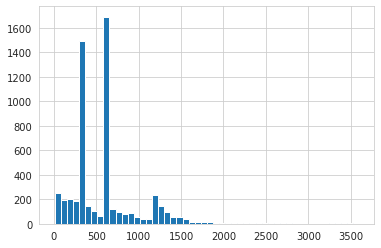

In [27]:
(df_tusz['length']/ df_tusz['fs_FP1']).hist(bins = 50)


In [28]:
testset = (df_tusz[df_tusz['file_name'].apply(lambda x: x.startswith('dev'))])
cond = testset['onsets'].apply(lambda x: x[0][0] if x[0][0] != 0 else pd.NA) <= testset['fs_FP1']
len(testset['onsets'].apply(lambda x: x if x[0][0] != 0 else []).sum())

# df_tusz[df_tusz['file_name'].apply(lambda x: x.startswith('dev'))]

673

In [29]:
df_tusz.to_csv('./output/TUSZ_labels.csv')

## eeg-gnn-ssl labels

In [30]:
df_gnn = pd.DataFrame(columns=["File", "label", "mode"])
for mode in ["trainSet", "testSet", "devSet"]:
    for sz_nosz in ["sz", "nosz"]:
        df_gnn_mode = pd.read_csv('./input/TUSZ/file_markers_detection/{}_seq2seq_60s_{}.txt'.format(mode, sz_nosz),
                             sep=',',
                             names=["File", "label"])
        df_gnn_mode["mode"] = mode
        df_gnn = pd.concat((df_gnn, df_gnn_mode))
df_gnn.sample(n=10)

,File,label,mode
20013,00009734_s001_t000.edf_15.h5,0,trainSet
2266,00007094_s003_t008.edf_0.h5,0,trainSet
24717,00000906_s018_t000.edf_23.h5,0,trainSet
1142,00010591_s002_t001.edf_4.h5,1,trainSet
20387,00009232_s001_t002.edf_9.h5,0,trainSet
16800,00012418_s004_t005.edf_5.h5,0,trainSet
6978,00009578_s026_t004.edf_0.h5,0,testSet
2710,00008303_s002_t005.edf_0.h5,0,devSet
2942,00001864_s001_t001.edf_8.h5,0,trainSet
366,00005371_s001_t000.edf_5.h5,1,devSet


In [31]:
df_gnn[df_gnn['mode'] == 'testSet'].head()

,File,label,mode
0,00010062_s004_t002.edf_11.h5,1,testSet
1,00008544_s007_t000.edf_12.h5,1,testSet
2,00009578_s011_t008.edf_37.h5,1,testSet
3,00000675_s001_t001.edf_10.h5,1,testSet
4,00008174_s002_t003.edf_1.h5,1,testSet


In [32]:
df_gnn['file_index'] = df_gnn["File"].apply(lambda x: int(x.split('.h5')[0].split('_')[-1]))
df_gnn['file_name'] = df_gnn["File"].apply(lambda x: x.split('.edf')[0])
df_gnn.head()

,File,label,mode,file_index,file_name
0,00004892_s001_t001.edf_23.h5,1,trainSet,23,00004892_s001_t001
1,00011580_s001_t008.edf_5.h5,1,trainSet,5,00011580_s001_t008
2,00010418_s016_t001.edf_5.h5,1,trainSet,5,00010418_s016_t001
3,00007793_s001_t001.edf_1.h5,1,trainSet,1,00007793_s001_t001
4,00006440_s004_t000.edf_2.h5,1,trainSet,2,00006440_s004_t000


In [33]:
df_gnn.groupby('mode')['label'].value_counts()

mode      label
devSet    0         4878
          1          625
testSet   0         7550
          1         1298
trainSet  0        35019
          1         3594
Name: label, dtype: int64

In [50]:
df_gnn[df_gnn['mode']=='testSet']

,File,label,mode,file_index,file_name
0,00010062_s004_t002.edf_11.h5,1,testSet,11,00010062_s004_t002
1,00008544_s007_t000.edf_12.h5,1,testSet,12,00008544_s007_t000
2,00009578_s011_t008.edf_37.h5,1,testSet,37,00009578_s011_t008
3,00000675_s001_t001.edf_10.h5,1,testSet,10,00000675_s001_t001
4,00008174_s002_t003.edf_1.h5,1,testSet,1,00008174_s002_t003
...,...,...,...,...,...
7545,00009578_s011_t003.edf_3.h5,0,testSet,3,00009578_s011_t003
7546,00008460_s007_t003.edf_8.h5,0,testSet,8,00008460_s007_t003
7547,00010022_s004_t001.edf_5.h5,0,testSet,5,00010022_s004_t001
7548,00009578_s027_t008.edf_2.h5,0,testSet,2,00009578_s027_t008


In [49]:
df_tusz[df_tusz['file_name'].apply(lambda x: '000002_s001_t000.edf' in x)]

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf,seconds
4191,train/02_tcp_le/000/00000002_s001_t000.edf,250,[[9221]],[[59302]],2,75250,00000002_s001_t000,301.0


In [36]:
unique_df = df_gnn.groupby('file_name')['mode'].unique().reset_index(name='mode')
unique_df['mode'].value_counts()

[trainSet]    3896
[testSet]      879
[devSet]       582
Name: mode, dtype: int64

In [37]:
df_tusz['file_name_edf'] = df_tusz['file_name'].apply(lambda x: x.split('/')[-1].split('.edf')[0])
df_tusz.head()

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf
0,dev/01_tcp_ar/002/00000258_s002_t000.edf,400,[[0]],[[0]],258,8000,00000258_s002_t000
1,dev/01_tcp_ar/002/00000258_s002_t002.edf,400,[[0]],[[0]],258,108800,00000258_s002_t002
2,dev/01_tcp_ar/002/00000258_s003_t000.edf,400,[[0]],[[0]],258,93600,00000258_s003_t000
3,dev/01_tcp_ar/002/00000258_s003_t001.edf,400,[[0]],[[0]],258,89600,00000258_s003_t001
4,dev/01_tcp_ar/002/00000258_s003_t002.edf,400,[[3531]],[[69351]],258,81200,00000258_s003_t002


In [38]:
df_tusz['file_name_edf'].nunique()

5612

In [39]:
df_gnn_single_index = df_gnn.drop_duplicates(subset=['file_name'], keep='last')
df_merged = pd.merge(left=df_tusz, right=df_gnn_single_index, how="outer", left_on='file_name_edf', right_on="file_name",suffixes=("", "_y"))
df_merged.sample(n=15)
df_merged.to_csv('./output/TUSZ_gnn_labels.csv')

In [40]:
df_merged[df_merged.isna().any(axis=1)]

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf,File,label,mode,file_index,file_name_y
0,dev/01_tcp_ar/002/00000258_s002_t000.edf,400,[[0]],[[0]],258,8000,00000258_s002_t000,NaN,NaN,NaN,NaN,NaN
13,dev/01_tcp_ar/010/00001027_s003_t000.edf,400,[[0]],[[0]],1027,185600,00001027_s003_t000,NaN,NaN,NaN,NaN,NaN
14,dev/01_tcp_ar/010/00001027_s003_t001.edf,400,[[0]],[[0]],1027,177200,00001027_s003_t001,NaN,NaN,NaN,NaN,NaN
15,dev/01_tcp_ar/010/00001027_s004_t000.edf,400,[[13622]],[[64924]],1027,133600,00001027_s004_t000,NaN,NaN,NaN,NaN,NaN
16,dev/01_tcp_ar/010/00001027_s004_t001.edf,400,[[34935]],[[89203]],1027,141200,00001027_s004_t001,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5506,train/03_tcp_ar_a/122/00012262_s002_t002.edf,256,[[0]],[[0]],12262,6656,00012262_s002_t002,NaN,NaN,NaN,NaN,NaN
5536,train/03_tcp_ar_a/124/00012418_s004_t003.edf,256,[[0]],[[0]],12418,5888,00012418_s004_t003,NaN,NaN,NaN,NaN,NaN
5566,train/03_tcp_ar_a/129/00012957_s004_t006.edf,256,[[0]],[[0]],12957,10496,00012957_s004_t006,NaN,NaN,NaN,NaN,NaN
5588,train/03_tcp_ar_a/130/00013085_s002_t013.edf,256,[[0]],[[0]],13085,6400,00013085_s002_t013,NaN,NaN,NaN,NaN,NaN


In [51]:
df_merged[df_merged['onsets'].apply(lambda x: x[0][0] != 0)].sample(n=5)

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf,File,label,mode,file_index,file_name_y
1803,train/01_tcp_ar/079/00007936_s007_t001.edf,256,[[25072]],[[45692]],7936,69120,00007936_s007_t001,00007936_s007_t001.edf_0.h5,0,trainSet,0.0,00007936_s007_t001
116,dev/01_tcp_ar/065/00006546_s022_t000.edf,256,[[44488]],[[50963]],6546,76800,00006546_s022_t000,NaN,NaN,NaN,NaN,NaN
1220,train/01_tcp_ar/025/00002521_s002_t000.edf,400,[[400]],[[88400]],2521,88800,00002521_s002_t000,00002521_s002_t000.edf_0.h5,1,trainSet,0.0,00002521_s002_t000
4862,train/03_tcp_ar_a/036/00003636_s001_t002.edf,400,[[400]],[[27799]],3636,60400,00003636_s001_t002,00003636_s001_t002.edf_0.h5,1,trainSet,0.0,00003636_s001_t002
4054,train/01_tcp_ar/129/00012973_s006_t002.edf,256,"[[8742], [119590]]","[[31286], [134221]]",12973,153856,00012973_s006_t002,00012973_s006_t002.edf_5.h5,0,trainSet,5.0,00012973_s006_t002


In [61]:
df_merged['tcp']=df_merged['file_name'].apply(lambda x: ' '.join(x.split('/')[:2]))
df_merged.groupby('mode')['tcp'].value_counts()

mode      tcp              
devSet    train 01_tcp_ar       392
          train 03_tcp_ar_a     108
          train 02_tcp_le        82
testSet   dev 01_tcp_ar         800
          dev 03_tcp_ar_a        41
          dev 02_tcp_le          38
trainSet  train 01_tcp_ar      2707
          train 03_tcp_ar_a     797
          train 02_tcp_le       392
Name: tcp, dtype: int64

In [42]:
df_tusz['seconds'] = df_tusz['length'] / df_tusz['fs_FP1']
# df_tusz.groupby('patient')['seconds'].sum().reset_index().sort_values('patient')
df_tusz_validation_choose = df_tusz.groupby('patient').size().reset_index(name='count')
pd.merge(df_tusz_validation_choose,
df_tusz.groupby('patient')['seconds'].sum().reset_index(name='seconds'), on='patient').sort_values('seconds')

,patient,count,seconds
379,7771,1,42.0
576,11575,1,79.0
624,12978,1,140.0
152,2568,2,504.0
77,1246,3,512.0
...,...,...,...
236,4671,77,48002.0
530,10418,92,51109.0
327,6546,121,62489.0
459,9104,96,68344.0


## Channels

In [43]:
EEG_channels = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF',
                'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF',
                'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']

fs_df.sample(3)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Seizure Type,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop,fs_FP1
3534,./train/01_tcp_ar/119/00011915/s002_2014_07_10...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",3416.0,2550.0,11915.0,s002,t003,ICU,RICU,...,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/119/00011915/s002_2014_07_10...,0,[[0]],[[0]],256
5408,./train/02_tcp_le/064/00006413/s004_2010_02_15...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",132.0,82.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/064/00006413/s004_2010_02_15...,0,[[280000]],[[292638]],250
5680,./train/02_tcp_le/003/00000302/s002_2003_09_25...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",333.0,214.0,NaN,NaN,t000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/003/00000302/s002_2003_09_25...,0,[[0]],[[0]],250


In [44]:
fs_df['ref_ch_num'] = fs_df['ch'].apply(lambda x: sum([(a in EEG_channels) for a in x]))
fs_df.sample(5)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop,fs_FP1,ref_ch_num
4875,./train/01_tcp_ar/103/00010321/s001_2013_05_17...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",3897.0,2987.0,10321.0,s001,t000,ICU,RICU,...,NaN,NaN,NaN,NaN,./train/01_tcp_ar/103/00010321/s001_2013_05_17...,0,[[0]],[[0]],250,21
5160,./train/01_tcp_ar/100/00010079/s004_2013_07_02...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",2820.0,2182.0,NaN,NaN,t007,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/01_tcp_ar/100/00010079/s004_2013_07_02...,0,[[0]],[[0]],256,21
4648,./train/01_tcp_ar/081/00008143/s009_2011_11_16...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1288.0,919.0,NaN,NaN,t003,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/01_tcp_ar/081/00008143/s009_2011_11_16...,0,[[0]],[[0]],256,21
3352,./train/01_tcp_ar/028/00002806/s001_2004_12_23...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4315.0,3348.0,NaN,NaN,t005,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/01_tcp_ar/028/00002806/s001_2004_12_23...,0,[[0]],[[0]],400,21
5820,./train/02_tcp_le/011/00001113/s002_2004_08_31...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",652.0,389.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/02_tcp_le/011/00001113/s002_2004_08_31...,0,[[259244]],[[260652]],250,0


In [45]:
fs_df['ref_ch_num'].value_counts()

21    5156
19    1441
0      916
Name: ref_ch_num, dtype: int64

In [46]:
fs_df[fs_df['ref_ch_num'] == 0]['filename'].apply(lambda x: str(x.split('/')[1:3])).unique()


array(["['dev', '02_tcp_le']", "['train', '02_tcp_le']"], dtype=object)

In [47]:
fs_df[fs_df['filename'].apply(lambda x: x.startswith('./dev/02'))]

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop,fs_FP1,ref_ch_num
1207,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1287.0,924.0,3635.0,s001,t001,Outpatient,Outpatient,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[49760]],[[50615]],250,0
1208,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1288.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[78005]],[[78766]],250,0
1209,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1289.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[152529]],[[153039]],250,0
1210,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1290.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[189231]],[[190028]],250,0
1211,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1291.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[215928]],[[216426]],250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1278.0,921.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,0,[[201644]],[[214247]],250,0
1324,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1279.0,921.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,0,[[227223]],[[257410]],250,0
1325,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1280.0,921.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,0,[[267624]],[[303109]],250,0
1326,./dev/02_tcp_le/010/00001027/s001_2004_01_27/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1249.0,906.0,1027.0,s001,t001,Inpatient,General,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/010/00001027/s001_2004_01_27/0...,0,[[139171]],[[169729]],250,0


In [48]:
EEG_channels_LE = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE',
                'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE',
                'EEG T5-LE', 'EEG T6-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE']

def get_EEG_index(eeg_labels):
    indices = []
    for label, label_le in zip(EEG_channels, EEG_channels_LE):
        if label in eeg_labels:
            indices.append(eeg_labels.index(label))
        elif label_le in eeg_labels:
            indices.append(eeg_labels.index(label_le))
        else:
            indices.append(-1)
    return indices

fs_df['ref_ch'] = fs_df['ch'].apply(get_EEG_index)
fs_df['ref_ch'].astype(str).unique()

array(['[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 27, 28, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 27, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 16, 17, 18]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 24, 25, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 23, 24, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 22, 23, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 6, 7, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, -1, -1, 16, 17, 18]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, -1, -1, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 26, 18, 19, 20]'],
      dtype=object)